In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

Matplotlib is building the font cache; this may take a moment.


1)Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].

Значение ковариации, рассчитанное по формуле
9157.84
Значение ковариации, рассчитанное с помощью функции cov
[[ 3494.64  9157.84]
 [ 9157.84 30468.89]]


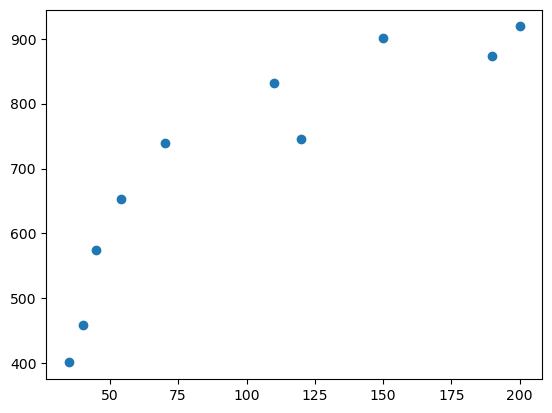

In [2]:
# Найдите ковариацию этих двух величин с помощью элементарных действий, а затем с помощью функции cov из numpy
# Ковариация cov_xy = M(XY) − M(X) ∗ M(Y),
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
plt.scatter(zp, ks)
𝞼_zp = np.mean(zp)
𝞼_ks = np.mean(ks)
𝞼 = np.mean(zp*ks)
cov = 𝞼 - (𝞼_zp * 𝞼_ks)
print(f'Значение ковариации, рассчитанное по формуле')
print(round(cov, 2))
print(f'Значение ковариации, рассчитанное с помощью функции cov')
print(np.cov(zp, ks, ddof=0))

In [ ]:
### Найдите коэффициент корреляции Пирсона с помощью ковариации и среднеквадратичных отклонений двух признаков, а затем с использованием функций из библиотек numpy и pandas.Коэффициент корреляции Пирсона 𝑟_𝑥𝑦 = 𝑐𝑜𝑣_𝑥𝑦 /(𝞼_𝑥 ∗ 𝞼_𝑦)

In [3]:
print(f'Коэффициент корреляции Пирсона, расcчитанный с помощью numpy')
print(np.corrcoef(zp, ks))

Коэффициент корреляции Пирсона, расcчитанный с помощью numpy
[[1.         0.88749009]
 [0.88749009 1.        ]]


In [4]:
df = pd.DataFrame(data={'zp':zp, 'ks':ks})
print(f'Коэффициент корреляции Пирсона, расcчитанный с помощью pandas')
print(df.corr())

Коэффициент корреляции Пирсона, расcчитанный с помощью pandas
         zp       ks
zp  1.00000  0.88749
ks  0.88749  1.00000


In [5]:
print(f'Несмещенная ковариация:', np.cov(zp, ks, ddof=1)) # 10175.378
print(f'Несмещенное стандартное отклонение zp:', np.std(zp, ddof = 1)) # 62.313
print(f'Несмещенное стандартное отклонение ks:', np.std(ks, ddof = 1)) # 183.995
print(f'Коэффициент корреляции Пирсона:', 10175.378 / (62.313*183.995))

Несмещенная ковариация: [[ 3882.93333333 10175.37777778]
 [10175.37777778 33854.32222222]]
Несмещенное стандартное отклонение zp: 62.31318747531162
Несмещенное стандартное отклонение ks: 183.99544076477068
Коэффициент корреляции Пирсона: 0.8874949075765891


In [6]:
print(f'Смещенная ковариация:', np.cov(zp, ks, ddof=0)) # 9157.84
print(f'Смещенное стандартное отклонение zp:', np.std(zp, ddof = 0)) # 59.115
print(f'Смещенное стандартное отклонение ks:', np.std(ks, ddof = 0)) # 174.553
print(f'Коэффициент корреляции Пирсона:', 9157.84 / (59.115*174.553)) 

Смещенная ковариация: [[ 3494.64  9157.84]
 [ 9157.84 30468.89]]
Смещенное стандартное отклонение zp: 59.115480206118605
Смещенное стандартное отклонение ks: 174.55340157098058
Коэффициент корреляции Пирсона: 0.8874993431282905


2)Измерены значения IQ выборки студентов, обучающихся в местных технических вузах: 131, 125, 115, 122, 131, 115, 107, 99, 125, 111. Известно, что в генеральной совокупности IQ распределен нормально. Найдите доверительный интервал для математического ожидания с надежностью 0.95

In [7]:
# Х ± 𝑡_(𝛼/2) ∗ 𝜎/√𝑛
a = np.array([131, 125, 115, 122, 131, 115, 107, 99, 125, 111])
n = len(a) # 10
X = np.mean(a) # 118.1
𝜎 = np.std(a, ddof=1) # 10.546
t = stats.t.ppf(0.975, len(a)-1) # 2.262
print(f'[{round(X-t*𝜎/np.sqrt(n), 2)}; {round(X+t*𝜎/np.sqrt(n), 2)}]')

[110.56; 125.64]


3)Известно, что рост футболистов в сборной распределен нормально с дисперсией генеральной совокупности, равной 25 кв.см. Объем выборки равен 27, среднее выборочное составляет 174.2. Найдите доверительный интервал для математического ожидания с надежностью 0.95.

In [8]:
# Х ± 𝑍_(𝛼/2) ∗ 𝜎/√𝑛
Х  = 174.2
Z = 1.96 # для 𝛼 = 0.05/2 = 0.025
𝜎 = 5 # √25 = 5
𝑛 = 27
print(f'[{round(Х - Z * 𝜎 / (n)**0.5, 2)}; {round(Х + Z * 𝜎 / (n)**0.5, 2)}]') 

[172.31; 176.09]
